In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, roc_auc_score

import time

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

 # Classification Modelling
 1. Classify if horse can win 1st position
 2. Classify if horse can win top 3 positions
 3. Classify if horse can be ranked in the top half

In [64]:
# Read the train and test files
df_train = pd.read_csv('./data/df_train.csv', index_col=0)
df_test = pd.read_csv('./data/df_test.csv', index_col=0)

In [65]:
# View the shape of the train and test files
print(df_train.shape)
print(df_test.shape)

(23500, 26)
(5864, 26)


In [66]:
# View the first 2 rows of the train file
df_train.head(2)

,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,...,running_position_6,race_id,recent_6_runs,recent_ave_rank,race_distance,HorseWin,HorseRankTop3,HorseRankTop50Percent,jockey_ave_rank,trainer_ave_rank
finishing_position,,,,,,,,,,,,,,,,,,,,,
1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,...,NaN,2014-001,1,1.0,1400,1,1,1,6.052910,7.381862
2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,...,NaN,2014-001,2,2.0,1400,0,1,1,5.825153,6.611465


In [67]:
# View the first 2 rows of the test files
df_test.head(2)

,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,...,running_position_6,race_id,recent_6_runs,recent_ave_rank,race_distance,HorseWin,HorseRankTop3,HorseRankTop50Percent,jockey_ave_rank,trainer_ave_rank
finishing_position,,,,,,,,,,,,,,,,,,,,,
1,5.0,POWERMAX,A009,N Callan,R Gibson,126,1124,9,-,2.0,...,NaN,2016-328,1/4/3/3,2.7500,1200,1,1,1,6.438751,6.715420
2,2.0,BUDDY BUNDY,T157,K K Chiong,D Cruz,127,1193,8,SH,1.0,...,NaN,2016-328,2/11/5/2/6/9,6.8125,1200,0,1,1,6.499033,7.381862


In [68]:

# Keep the features we want to train our model on
X_train = df_train[['actual_weight', 'declared_horse_weight',
                    'draw', 'win_odds', 'jockey_ave_rank',
                    'trainer_ave_rank', 'recent_ave_rank', 'race_distance']]

y_train = df_train[['HorseWin', 'HorseRankTop3', 'HorseRankTop50Percent']]

# Keep the features we want to train our model on
X_test = df_test[['actual_weight', 'declared_horse_weight',
                   'draw', 'win_odds','jockey_ave_rank',
                    'trainer_ave_rank', 'recent_ave_rank', 'race_distance']]
                    
y_test = df_test[['HorseWin', 'HorseRankTop3', 'HorseRankTop50Percent']]

In [69]:
# View the shape of the train and test files
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23500, 8)
(23500, 3)
(5864, 8)
(5864, 3)


In [70]:
# Check the mean of the target variable
y_train.mean()

HorseWin                 0.080128
HorseRankTop3            0.239787
HorseRankTop50Percent    0.499489
dtype: float64

We can see that there is data imbalance for the HorseWin and HorseRankTop3 variables, so we need to account for these later when modelling.

In [71]:
# Specify kfold cross validation
kfold = KFold(n_splits=5)

### Model 1: Logistic Regression

In [72]:
# Initialize the model
lr = LogisticRegression()

In [73]:
# Calculate the cross validation score
# Round the score to 3 decimal places

score_lr_win = cross_val_score(lr, X_train, y_train['HorseWin'],
                              cv = kfold, scoring = 'f1').mean()
score_lr_win = round(score_lr_win, 3)

score_lr_top3 = cross_val_score(lr, X_train,y_train['HorseRankTop3'],
                              cv = kfold,scoring = 'f1').mean()
score_lr_top3 = round(score_lr_top3, 3)

score_lr_top50 = cross_val_score(lr,X_train, y_train['HorseRankTop50Percent'],
                              cv = kfold,scoring = 'f1').mean()
score_lr_top50 = round(score_lr_top50, 3)

print("Cross Validation mean score for Logistic Regression:",'\n',
      "Horse win:", score_lr_win,'\n',\
      "Horse in Top 3:", score_lr_top3,'\n',\
      "Horse in Top 50%:", score_lr_top50)

# Create table to store the results
cross_val_score_table = pd.DataFrame(columns = ['Model', 'HorseWin', 'HorseRankTop3', 'HorseRankTop50Percent'])

# Add scores to the table
cross_val_score_table = cross_val_score_table.append({'Model': 'Logistic Regression',
                                                         'HorseWin': score_lr_win,
                                                            'HorseRankTop3': score_lr_top3,
                                                            'HorseRankTop50Percent': score_lr_top50},
                                                            ignore_index = True)



Cross Validation mean score for Logistic Regression: 
 Horse win: 0.045 
 Horse in Top 3: 0.446 
 Horse in Top 50%: 0.721


In [74]:
cross_val_score_table

,Model,HorseWin,HorseRankTop3,HorseRankTop50Percent
0,Logistic Regression,0.045,0.446,0.721


In [75]:
# Get the classification predictions (1 or 0)
# start time
start_time = time.time()

lr.fit(X_train, y_train['HorseWin'])
lr_win = lr.predict(X_test)

lr.fit(X_train, y_train['HorseRankTop3'])
lr_top3 = lr.predict(X_test)

lr.fit(X_train,y_train['HorseRankTop50Percent'])
lr_top50 = lr.predict(X_test)

print('Running time for logistic regression is:', round(time.time() - start_time, 3), 'seconds')    

Running time for logistic regression is: 0.277 seconds


In [76]:
# Create new dataframe for predictions
lr_pred = pd.DataFrame()
lr_pred['RaceID'] = df_test['race_id']
lr_pred['HorseID'] = df_test['horse_id']

lr_pred['HorseWin'] = lr_win
lr_pred['HorseRankTop3'] = lr_top3
lr_pred['HorseRankTop50Percent'] = lr_top50

# Write predictions into csv file.
lr_pred.to_csv('lr_pred.csv')

For imbalanced data, 1 is more important than 0. The model may try to increase accuracy by predicting all 0. F1 score will be close to 0 while accuracy is close to 1. So for imbalanced data, F1 score (similarly TNR, NPV) is good choice.

F1 = 2 * (precision * recall) / (precision + recall)

Precision P = TP / (TP + FP), probability that one classified positive instance is classified correctly.

Recall R = TP / (TP +FN) , percentage of truly positive instances correctly classified. 


In [77]:
# F1 score for logistic regression
f1_win = round(f1_score(y_test['HorseWin'], lr_win), 3)

f1_top3 = round(f1_score(y_test['HorseRankTop3'], lr_top3), 3)

f1_top50 = round(f1_score(y_test['HorseRankTop50Percent'], lr_top50), 3)

# Print the F1 score
print("F1 score for Logistic Regression:",'\n',
      "Horse win:", f1_win,'\n',\
      "Horse in Top 3:", f1_top3,'\n',\
      "Horse in Top 50%:", f1_top50)

F1 score for Logistic Regression: 
 Horse win: 0.053 
 Horse in Top 3: 0.36 
 Horse in Top 50%: 0.694


In [78]:
# Confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix

# Confusion matrix for HorseWin
cm_lr_win = confusion_matrix(y_test['HorseWin'], lr_win)

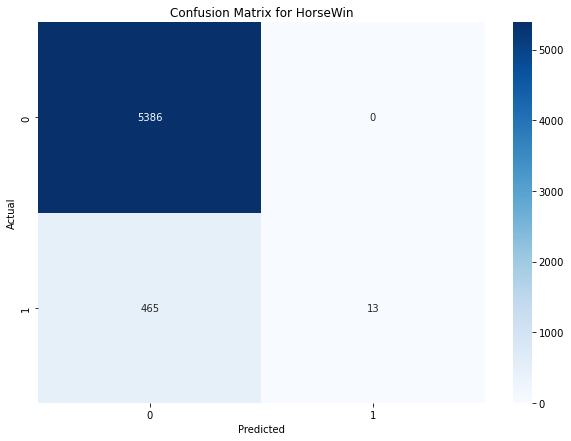

True positive rate for HorseWin: 0.027


In [79]:
# Plot the confusion matrix for HorseWin
plt.figure(figsize = (10, 7))
sns.heatmap(cm_lr_win, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for HorseWin')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the true positive rate
tpr = round(cm_lr_win[1, 1] / (cm_lr_win[1, 1] + cm_lr_win[1, 0]),3)
print('True positive rate for HorseWin:', tpr)

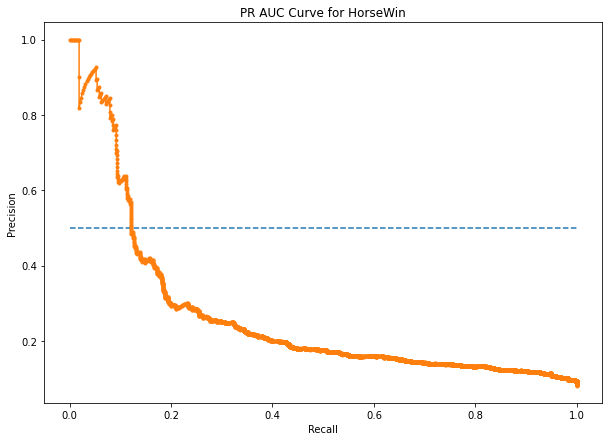

PR AUC score for HorseWin: 0.268


In [80]:
# Plot PR AUC curve for HorseWin
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# Get the probabilities of the predictions
lr_win_prob = lr.predict_proba(X_test)[:, 1]

# Get the precision and recall
precision, recall, thresholds = precision_recall_curve(y_test['HorseWin'], lr_win_prob)

# Plot the PR AUC curve
plt.figure(figsize = (10, 7))
plt.plot([0, 1], [0.5, 0.5], linestyle = '--')
plt.plot(recall, precision, marker = '.')
plt.title('PR AUC Curve for HorseWin')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Print the PR AUC score
from sklearn.metrics import auc
pr_auc = round(auc(recall, precision),3)
print('PR AUC score for HorseWin:', pr_auc)


In [81]:
# Create table to store f1 score and PR AUC score
f1_pr_auc_table = pd.DataFrame(columns = ['Model', 'F1_HorseWin', 'F1_HorseRankTop3',
                                        'F1_HorseRankTop50Percent', 'PR_AUC_Score', 'TPR'])

# Add scores to the table
f1_pr_auc_table = f1_pr_auc_table.append({'Model': 'Logistic Regression',
                                          'F1_HorseWin': score_lr_win,
                                          'F1_HorseRankTop3': score_lr_top3,
                                          'F1_HorseRankTop50Percent': score_lr_top50,
                                          'PR_AUC_Score': pr_auc,
                                          'TPR': tpr},
                                          ignore_index = True)

#

# Display the table
f1_pr_auc_table

,Model,F1_HorseWin,F1_HorseRankTop3,F1_HorseRankTop50Percent,PR_AUC_Score,TPR
0,Logistic Regression,0.045,0.446,0.721,0.268,0.027


### Model 2: Naïve Bayes

In [82]:
# Initialize the model
gnb = GaussianNB()

In [83]:
# Calculate the cross validation score
# Round the score to 3 decimal places

score_gnb_win = cross_val_score(gnb, X_train, y_train['HorseWin'],
                              cv = kfold, scoring = 'f1').mean()
score_gnb_win = round(score_gnb_win, 3)

score_gnb_top3 = cross_val_score(gnb, X_train,y_train['HorseRankTop3'],
                              cv = kfold, scoring = 'f1').mean() 
score_gnb_top3 = round(score_gnb_top3, 3)

score_gnb_top50 = cross_val_score(gnb,X_train, y_train['HorseRankTop50Percent'],
                              cv = kfold, scoring = 'f1').mean()
score_gnb_top50 = round(score_gnb_top50, 3)

# Print the cross validation score
print("Cross Validation mean score for Gaussian Naive Bayes:",'\n',
      "Horse win:", score_gnb_win,'\n',\
      "Horse in Top 3:", score_gnb_top3,'\n',\
      "Horse in Top 50%:", score_gnb_top50)

# Append the results to the table
cross_val_score_table = cross_val_score_table.append({'Model': 'Gaussian Naive Bayes',
                                                            'HorseWin': score_gnb_win,    
                                                            'HorseRankTop3': score_gnb_top3,    
                                                            'HorseRankTop50Percent': score_gnb_top50},
                                                            ignore_index = True)      

Cross Validation mean score for Gaussian Naive Bayes: 
 Horse win: 0.317 
 Horse in Top 3: 0.543 
 Horse in Top 50%: 0.73


In [84]:
# Get the classification predictions (1 or 0)
start_time2 = time.time()

gnb.fit(X_train, y_train['HorseWin'])
gnb_win = gnb.predict(X_test)

gnb.fit(X_train, y_train['HorseRankTop3'])
gnb_top3 = gnb.predict(X_test)

gnb.fit(X_train,y_train['HorseRankTop50Percent'])
gnb_top50 = gnb.predict(X_test)

print('Running time for Gaussian Naive Bayes is:', round(time.time() - start_time2, 3), 'seconds')

Running time for Gaussian Naive Bayes is: 0.032 seconds


In [85]:
# Create new dataframe for predictions

gnb_pred = pd.DataFrame()
gnb_pred['RaceID'] = df_test['race_id']
gnb_pred['HorseID'] = df_test['horse_id']

gnb_pred['HorseWin'] = gnb_win
gnb_pred['HorseRankTop3'] = gnb_top3
gnb_pred['HorseRankTop50Percent'] = gnb_top50

# Write predictions into csv file.
gnb_pred.to_csv('gnb_pred.csv')

In [86]:
# F1 score for Gaussian Naive Bayes
f1_win = round(f1_score(y_test['HorseWin'], gnb_win), 3)

f1_top3 = round(f1_score(y_test['HorseRankTop3'], gnb_top3), 3)

f1_top50 = round(f1_score(y_test['HorseRankTop50Percent'], gnb_top50), 3)

# Print the F1 score
print("F1 score for Gaussian Naive Bayes:",'\n',
        "Horse win:", f1_win,'\n',\
        "Horse in Top 3:", f1_top3,'\n',\
        "Horse in Top 50%:", f1_top50)

F1 score for Gaussian Naive Bayes: 
 Horse win: 0.282 
 Horse in Top 3: 0.506 
 Horse in Top 50%: 0.718


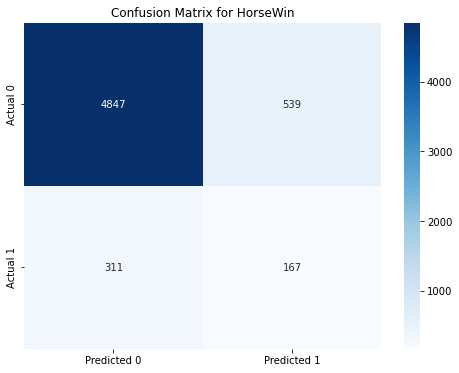

True positive rate for HorseWin: 0.349


In [87]:
# Confusion matrix for HorseWin
cm_gnb_win = confusion_matrix(y_test['HorseWin'], gnb_win)
cm_gnb_win = pd.DataFrame(cm_gnb_win, index = ['Actual 0', 'Actual 1'],
                            columns = ['Predicted 0', 'Predicted 1'])  

# Plot the confusion matrix for HorseWin
plt.figure(figsize = (8, 6))
plt.title('Confusion Matrix for HorseWin')
sns.heatmap(cm_gnb_win, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

# Print true positive rate
tpr = round(cm_gnb_win.iloc[1,1]/(cm_gnb_win.iloc[1,1] + cm_gnb_win.iloc[1,0]), 3)
print('True positive rate for HorseWin:', tpr)


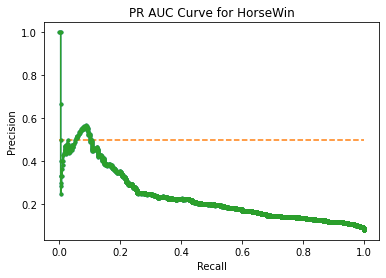

PR AUC score for HorseWin: 0.237


In [88]:
# Plot PR AUC curve for HorseWin

# Get the probability of predicting 1
gnb_win_prob = gnb.predict_proba(X_test)[:,1]

# Get the precision and recall
precision, recall, _ = precision_recall_curve(y_test['HorseWin'], gnb_win_prob)

# Plot the PR AUC curve
plt.plot(recall, precision, marker = '.')
plt.plot([0, 1], [0.5, 0.5], linestyle = '--')
plt.plot(recall, precision, marker = '.')
plt.title('PR AUC Curve for HorseWin')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Print the PR AUC score
pr_auc = round(auc(recall, precision),3)
print('PR AUC score for HorseWin:', pr_auc)


In [89]:
# Append the results to the table
f1_pr_auc_table = f1_pr_auc_table.append({'Model': 'Gaussian Naive Bayes',
                                            'F1_HorseWin': f1_win,
                                            'F1_HorseRankTop3': f1_top3,
                                            'F1_HorseRankTop50Percent': f1_top50,
                                            'PR_AUC_Score': pr_auc,
                                            'TPR': tpr}, 
                                            ignore_index = True)

# Display the table
f1_pr_auc_table

,Model,F1_HorseWin,F1_HorseRankTop3,F1_HorseRankTop50Percent,PR_AUC_Score,TPR
0,Logistic Regression,0.045,0.446,0.721,0.268,0.027
1,Gaussian Naive Bayes,0.282,0.506,0.718,0.237,0.349


### Model 3: Random Forest Classifier

In [90]:
# Initialize the model
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [91]:
# Calculate the cross validation score
# Round the score to 3 decimal places

score_rfc_win = cross_val_score(rfc, X_train, y_train['HorseWin'],
                                cv = kfold, scoring = 'f1').mean()
score_rfc_win = round(score_rfc_win, 3)

score_rfc_top3 = cross_val_score(rfc, X_train, y_train['HorseRankTop3'],
                                    cv = kfold, scoring = 'f1').mean()
score_rfc_top3 = round(score_rfc_top3, 3)

score_rfc_top50 = cross_val_score(rfc, X_train, y_train['HorseRankTop50Percent'],
                                    cv = kfold, scoring = 'f1').mean()
score_rfc_top50 = round(score_rfc_top50, 3)

# Print the cross validation score
print("Cross Validation mean score for Random Forest Classifier:",'\n',
        "Horse win:", score_rfc_win,'\n',\
        "Horse in Top 3:", score_rfc_top3,'\n',\
        "Horse in Top 50%:", score_rfc_top50)

# Add the cross validation score to the table
cross_val_score_table = cross_val_score_table.append({'Model': 'Random Forest Classifier',
                                                        'HorseWin': score_rfc_win,
                                                        'HorseRankTop3': score_rfc_top3,
                                                        'HorseRankTop50Percent': score_rfc_top50},
                                                        ignore_index = True)

Cross Validation mean score for Random Forest Classifier: 
 Horse win: 0.187 
 Horse in Top 3: 0.461 
 Horse in Top 50%: 0.71


In [92]:
# Get the classification predictions (1 or 0)
start_time3 = time.time()

rfc.fit(X_train, y_train['HorseWin'])
rfc_win = rfc.predict(X_test)

rfc.fit(X_train, y_train['HorseRankTop3'])
rfc_top3 = rfc.predict(X_test)

rfc.fit(X_train, y_train['HorseRankTop50Percent'])
rfc_top50 = rfc.predict(X_test)

print('Running time for Random Forest Classifier is:', round(time.time() - start_time3, 3), 'seconds')


Running time for Random Forest Classifier is: 6.91 seconds


In [93]:
# Create new dataframe for predictions
rfc_pred = pd.DataFrame()
rfc_pred['RaceID'] = df_test['race_id']
rfc_pred['HorseID'] = df_test['horse_id']

rfc_pred['HorseWin'] = rfc_win
rfc_pred['HorseRankTop3'] = rfc_top3
rfc_pred['HorseRankTop50Percent'] = rfc_top50

# Write predictions into csv file.
rfc_pred.to_csv('rfc_pred.csv')

In [94]:
# F1 score for Random Forest Classifier
f1_win = round(f1_score(y_test['HorseWin'], rfc_win), 3)
f1_top3 = round(f1_score(y_test['HorseRankTop3'], rfc_top3), 3)
f1_top50 = round(f1_score(y_test['HorseRankTop50Percent'], rfc_top50), 3)

# Print the F1 score
print("F1 score for Random Forest Classifier:",'\n',
        "Horse win:", f1_win,'\n',\
        "Horse in Top 3:", f1_top3,'\n',\
        "Horse in Top 50%:", f1_top50)

F1 score for Random Forest Classifier: 
 Horse win: 0.148 
 Horse in Top 3: 0.379 
 Horse in Top 50%: 0.694


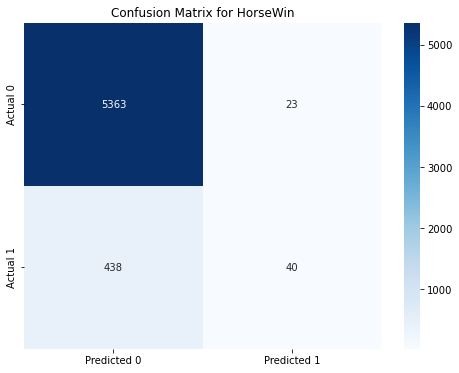

True positive rate for HorseWin: 0.084


In [95]:
# Confusion matrix for HorseWin
cm_rfc_win = confusion_matrix(y_test['HorseWin'], rfc_win)
cm_rfc_win = pd.DataFrame(cm_rfc_win, index = ['Actual 0', 'Actual 1'],
                            columns = ['Predicted 0', 'Predicted 1'])  

# Plot the confusion matrix for HorseWin
plt.figure(figsize = (8, 6))
plt.title('Confusion Matrix for HorseWin')
sns.heatmap(cm_rfc_win, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

# Print the true positive rate for HorseWin
tpr = round(cm_rfc_win.iloc[1,1]/(cm_rfc_win.iloc[1,1] + cm_rfc_win.iloc[1,0]), 3)
print('True positive rate for HorseWin:', tpr)

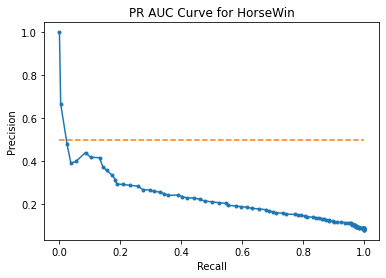

PR AUC score for HorseWin: 0.237


In [96]:
# Plot PR AUC curve for HorseWin

# Get the probability of predicting 1
rfc_win_prob = rfc.predict_proba(X_test)[:,1]

# Get the precision and recall
precision, recall, _ = precision_recall_curve(y_test['HorseWin'], rfc_win_prob)

# Plot the PR AUC curve
plt.plot(recall, precision, marker = '.')
plt.plot([0, 1], [0.5, 0.5], linestyle = '--')
plt.title('PR AUC Curve for HorseWin')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Print the PR AUC score
pr_auc = round(auc(recall, precision),3)
print('PR AUC score for HorseWin:', pr_auc)

In [97]:
# Append the results to the table
f1_pr_auc_table = f1_pr_auc_table.append({'Model': 'Random Forest Classifier',
                                            'F1_HorseWin': f1_win,
                                            'F1_HorseRankTop3': f1_top3,
                                            'F1_HorseRankTop50Percent': f1_top50,
                                            'PR_AUC_Score': pr_auc,
                                            'TPR': tpr},
                                            ignore_index = True)

# Display the table
f1_pr_auc_table

,Model,F1_HorseWin,F1_HorseRankTop3,F1_HorseRankTop50Percent,PR_AUC_Score,TPR
0,Logistic Regression,0.045,0.446,0.721,0.268,0.027
1,Gaussian Naive Bayes,0.282,0.506,0.718,0.237,0.349
2,Random Forest Classifier,0.148,0.379,0.694,0.237,0.084


###  Model 4: Smote + Random Forest Classifier

In [98]:
# Import the library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [99]:
# Smote the training data
sm = SMOTE(random_state = 42)
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=10,
                               random_state = 42)

# Steps for the pipeline
steps = [('smote', sm), ('rfc', rfc)]

# Create the pipeline
smote_rfc = Pipeline(steps = steps)


In [100]:
# Calculate the cross validation score
# Round the score to 3 decimal places

score_smote_rfc_win = cross_val_score(smote_rfc, X_train, y_train['HorseWin'],
                                cv = kfold, scoring = 'f1').mean()
score_smote_rfc_win = round(score_smote_rfc_win, 3)

score_smote_rfc_top3 = cross_val_score(smote_rfc, X_train, y_train['HorseRankTop3'],
                                    cv = kfold, scoring = 'f1').mean()
score_smote_rfc_top3 = round(score_smote_rfc_top3, 3)

score_smote_rfc_top50 = cross_val_score(smote_rfc, X_train, y_train['HorseRankTop50Percent'],
                                    cv = kfold, scoring = 'f1').mean()
score_smote_rfc_top50 = round(score_smote_rfc_top50, 3)

# Print the cross validation score
print("Cross Validation mean score for Random Forest Classifier with SMOTE:",'\n',
        "Horse win:", score_smote_rfc_win,'\n',\
        "Horse in Top 3:", score_smote_rfc_top3,'\n',\
        "Horse in Top 50%:", score_smote_rfc_top50)
        


Cross Validation mean score for Random Forest Classifier with SMOTE: 
 Horse win: 0.317 
 Horse in Top 3: 0.554 
 Horse in Top 50%: 0.719


In [101]:
# Add the cross validation score to the table
cross_val_score_table = cross_val_score_table.append({'Model': 'Random Forest Classifier with SMOTE',
                                                        'HorseWin': score_smote_rfc_win,
                                                        'HorseRankTop3': score_smote_rfc_top3,
                                                        'HorseRankTop50Percent': score_smote_rfc_top50},
                                                        ignore_index = True)

In [102]:
# Get the classification predictions (1 or 0)
start_time5 = time.time()

smote_rfc.fit(X_train, y_train['HorseWin'])
smote_rfc_win = smote_rfc.predict(X_test)

smote_rfc.fit(X_train, y_train['HorseRankTop3'])
smote_rfc_top3 = smote_rfc.predict(X_test)

smote_rfc.fit(X_train, y_train['HorseRankTop50Percent'])
smote_rfc_top50 = smote_rfc.predict(X_test)

print('Running time for RFC + Smote is:', round(time.time() - start_time5, 3), 'seconds')

Running time for RFC + Smote is: 9.559 seconds


In [103]:
# Create new dataframe for predictions
smote_rfc_pred = pd.DataFrame()
smote_rfc_pred['RaceID'] = df_test['race_id']
smote_rfc_pred['HorseID'] = df_test['horse_id']

smote_rfc_pred['HorseWin'] = smote_rfc_win
smote_rfc_pred['HorseRankTop3'] = smote_rfc_top3
smote_rfc_pred['HorseRankTop50Percent'] = smote_rfc_top50

# Write predictions into csv file.
smote_rfc_pred.to_csv('smote_rfc_pred.csv')

In [104]:
# f1 score for RFC + Smote
f1_win = round(f1_score(y_test['HorseWin'], smote_rfc_win), 3)
f1_top3 = round(f1_score(y_test['HorseRankTop3'], smote_rfc_top3), 3)
f1_top50 = round(f1_score(y_test['HorseRankTop50Percent'], smote_rfc_top50), 3)

# Print the F1 score
print("F1 score for RFC + Smote:",'\n',
        "Horse win:", f1_win,'\n',\
        "Horse in Top 3:", f1_top3,'\n',\
        "Horse in Top 50%:", f1_top50)

F1 score for RFC + Smote: 
 Horse win: 0.31 
 Horse in Top 3: 0.532 
 Horse in Top 50%: 0.71


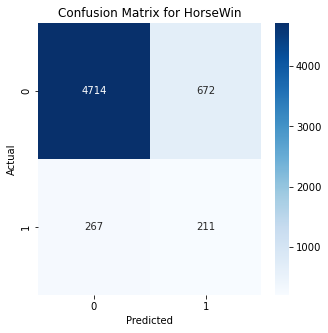

True positive rate for HorseWin: 0.441


In [105]:
# Confusion matrix for HorseWin
cm = confusion_matrix(y_test['HorseWin'], smote_rfc_win)

# Plot the confusion matrix
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for HorseWin')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print true positive rate
tpr = round(cm[1,1]/(cm[1,1]+cm[1,0]), 3)
print('True positive rate for HorseWin:', tpr)


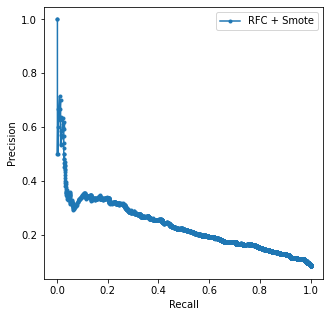

PR AUC score for RFC + Smote: 0.236


In [106]:
# PR AUC Curve for HorseWin

# Get the probabilities for HorseWin
smote_rfc.fit(X_train, y_train['HorseWin'])
smote_rfc_win_prob = smote_rfc.predict_proba(X_test)[:,1]

# Calculate the precision and recall
precision, recall, _ = precision_recall_curve(y_test['HorseWin'], smote_rfc_win_prob)

# Calculate the PR AUC score
pr_auc = round(auc(recall, precision), 3)

# Plot the PR AUC curve
plt.figure(figsize = (5,5))
plt.plot(recall, precision, marker = '.', label = 'RFC + Smote')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Show the PR AUC score
print('PR AUC score for RFC + Smote:', pr_auc)


In [107]:
# Append the F1 score and PR AUC score to the table
f1_pr_auc_table = f1_pr_auc_table.append({'Model': 'Random Forest Classifier with SMOTE',
                                            'F1_HorseWin': f1_win,
                                            'F1_HorseRankTop3': f1_top3,
                                            'F1_HorseRankTop50Percent': f1_top50,
                                            'PR_AUC_Score': pr_auc,
                                            'TPR': tpr},
                                            ignore_index = True)

# Print the table
f1_pr_auc_table



,Model,F1_HorseWin,F1_HorseRankTop3,F1_HorseRankTop50Percent,PR_AUC_Score,TPR
0,Logistic Regression,0.045,0.446,0.721,0.268,0.027
1,Gaussian Naive Bayes,0.282,0.506,0.718,0.237,0.349
2,Random Forest Classifier,0.148,0.379,0.694,0.237,0.084
3,Random Forest Classifier with SMOTE,0.310,0.532,0.710,0.236,0.441


### View the final results of our 4 classification models

In [108]:
# View the cross validation score table
cross_val_score_table

,Model,HorseWin,HorseRankTop3,HorseRankTop50Percent
0,Logistic Regression,0.045,0.446,0.721
1,Gaussian Naive Bayes,0.317,0.543,0.730
2,Random Forest Classifier,0.187,0.461,0.710
3,Random Forest Classifier with SMOTE,0.317,0.554,0.719


In [109]:
# View the F1 score and PR AUC score table
f1_pr_auc_table

,Model,F1_HorseWin,F1_HorseRankTop3,F1_HorseRankTop50Percent,PR_AUC_Score,TPR
0,Logistic Regression,0.045,0.446,0.721,0.268,0.027
1,Gaussian Naive Bayes,0.282,0.506,0.718,0.237,0.349
2,Random Forest Classifier,0.148,0.379,0.694,0.237,0.084
3,Random Forest Classifier with SMOTE,0.310,0.532,0.710,0.236,0.441


We will choose the Random Forest Classifer with SMOTE as our model.